In [1]:
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


conn = psycopg2.connect(
        host="141.100.70.97",
        database="sync3",
        user="sync3",
        password="sync3",
        port="5432",
)

In [92]:
ls_head = 20  # Überschrift
ls_axis = 18  # x/y-Beschriftung
ls_font = 16  # Schrif (zB .text)
ls_label = 16  # Werte x/y-Achse
ls_legend = 16  # Schriftgröße der Legende
figsize = (10, 8)
alphalegend = 0.9
s_dpi = 300

# Übergabe in ein Dict und anschließend aktualisieren der Parameter
rc = {'figure.figsize': figsize,
      'legend.framealpha': alphalegend,
      'axes.labelsize': ls_axis, 'font.size': ls_font, 'legend.fontsize': ls_legend,
      'axes.titlesize': ls_head, 'xtick.labelsize': ls_label, 'ytick.labelsize': ls_label,
      'grid.color': 'k', 'grid.linestyle': '--',
      "savefig.dpi": s_dpi, "savefig.format": 'svg'}
plt.rcParams.update(**rc)

# Anzahl der Businesses, die zwischen 9 und 100 Reviews haben

FileNotFoundError: [Errno 2] No such file or directory: 'Plots/Revcounts_100.png'

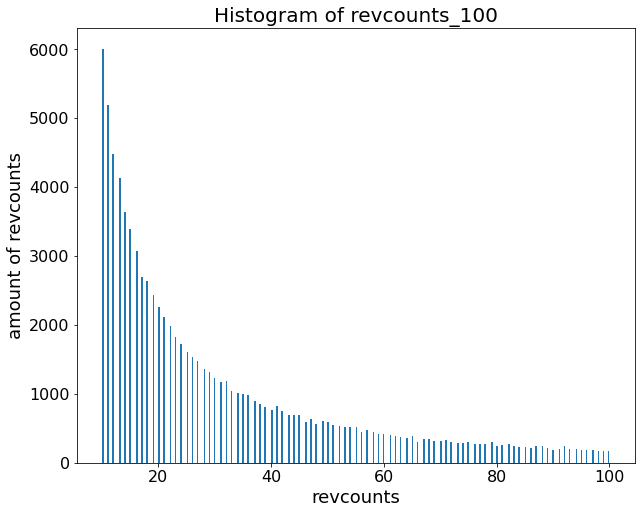

In [3]:
def plot_res(daten, filename,x_label,y_label,title):
        plt.hist(daten, 300, density=False, log=False)
        # plt.xlim(0,700)
        plt.xlabel(x_label)
        plt.ylabel('amount of '+y_label)
        plt.title('Histogram of ' +title)
        plt.savefig(filename+".png", dpi=300)
        plt.show()

        # matplotlib.pyplot.hist(revcount_ar,50)
        plt.hist(daten, 300, density=True, log=True)
        plt.xlim(0, 1000)
        plt.xlabel(x_label)
        plt.ylabel('amount of ' + y_label)
        plt.title('Histogram of ' + title)
        plt.savefig(filename+"_log.png", dpi=300)
        plt.show()

        plt.hist(revcount_ar, 300, density=False, log=True)
        # plt.xlim(0,700)
        plt.xlabel(x_label)
        plt.ylabel('amount of ' + y_label)
        plt.title('Histogram of ' + title)
        plt.gca().set_xscale("log")
        plt.savefig(filename+"_loglog.png", dpi=300)
        plt.show()

def sql_query(query):
        cur = conn.cursor()
        business_query = cur.execute(query)
        data = cur.fetchall()
        cur.close()

        return data
    
data=sql_query('select bid,revcount  from business Filter where revcount >9 and revcount<=100 Order by revcount ASC;')

conn.close()



amount_data = len(data)
bid_list = []
revcount_ar = np.zeros(amount_data)
for i in range(0,amount_data):
        bid_list.append(data[i][0])
        revcount_ar[i] = data[i][1]
        
plot_res(revcount_ar,"Plots/Revcounts_100","revcounts","revcounts","revcounts_100")

# User, die mehr als 100 Bewertungen an Food Businesses abgegeben haben
###### (bei 10 Bewertungen wird die Laufzeit zu groß)

In [6]:
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


conn = psycopg2.connect(
        host="141.100.70.97",
        database="sync3",
        user="sync3",
        password="sync3",
        port="5432",
)
cursor = conn.cursor()
query = "select uid,revcount,avgstars,cat from users,categories where categories.cat='Food' and users.revcount>=100;"
cursor.execute(query)
data = cursor.fetchall()
df = pd.read_sql(query,conn)
conn.close()

print(df)


                          uid  revcount  avgstars   cat
0      HAj21XJRnfXp9w8NVBTQTA       112      4.18  Food
1      JV0GpXUGaZpsK56WUe1uzQ       112      3.96  Food
2      SxY4qXVBMgaTQwEUzkSdFQ       664      4.19  Food
3      DO2gBURZ-8cKtrVZSTiClA       118      2.69  Food
4      jiMHTvVpoBChdxA30cfQ9w       119      3.91  Food
...                       ...       ...       ...   ...
86289  2xkYLCmJWiaL1zo2C7c1hw       248      3.74  Food
86290  Nxr5C4m0edwetAeRUacP6A       571      3.85  Food
86291  F8iO4p_neiDaHH6qnDsKbw       161      3.82  Food
86292  Ad8lg8eD5VseGw5o-xaJCw       390      4.36  Food
86293  mdnGlvTz9B2WfCQX0ty3fA       481      3.22  Food

[86294 rows x 4 columns]


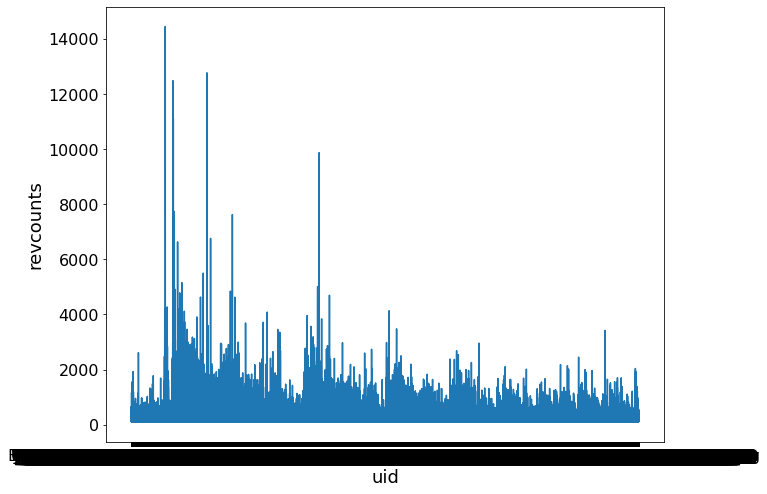

In [7]:
uid_list = []
revcount_array = np.zeros(len(df))
for i in range(0,len(df)):
    uid_list.append(data[i][0])
    revcount_array[i]=data[i][1]
x = np.array(uid_list)
y= revcount_array
#print(x)
#print(len(x))
#print(y)
plt.plot(x,y)
plt.xlabel("uid")
plt.ylabel("revcounts")
plt.show()

# Durchschnitt an Sternen, die User vergeben (wenn sie mehr als 100 Bewertungen abgegeben haben)


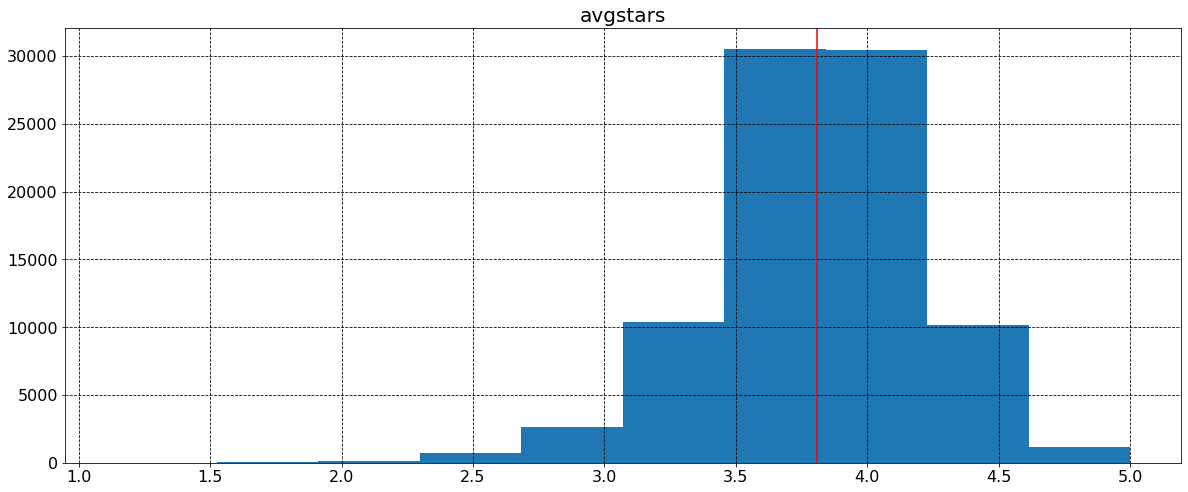

In [5]:
df.hist(column=["avgstars"])
plt.axvline(df['avgstars'].mean(),color='r')
plt.savefig('picture_präsi/Durchschnittsbewertung.svg', dpi=300)

-----------------------------------------------------------------------------------------------------------------------------

# Bewertungen an Tagen, an denen die Temperatur unter 0 Grad lag: 

   star   count
0     1   69842
1     2   59295
2     3   93801
3     4  182147
4     5  216949


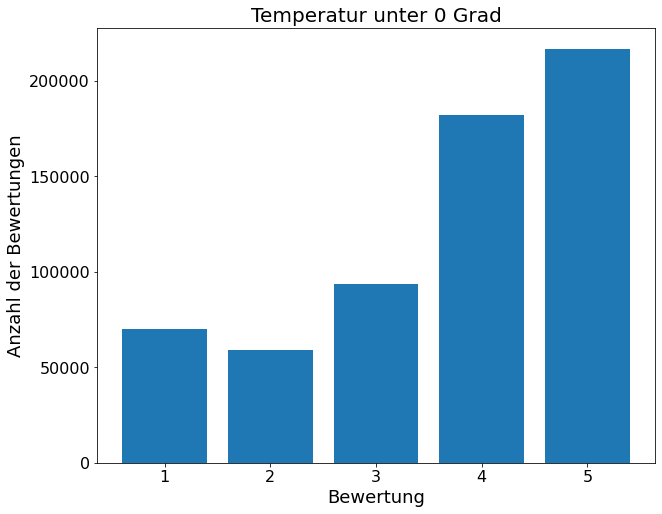

In [55]:
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


conn = psycopg2.connect(
        host="141.100.70.97",
        database="sync3",
        user="sync3",
        password="sync3",
        port="5432",
)
cursor = conn.cursor()
#query = "select cw.date, cw.tmax, cw.tmin, cw.perception,cw.snow,cw.snowdepth,star from cluster_weather as cw inner join reviews on cw.date=reviews.date where tmin<0 limit 10000;"
query = """
select star, count(*) from
reviews inner join business as b
on b.bid=reviews.bid
inner join cluster_weather as cw
on b.clusterid = cw.clusterid and cw.date = reviews.date
where cw.tmin<0 and b.bid in (select bid from category
where cid = (select cid from categories where cat = 'Restaurants'))
group by star
"""


cursor.execute(query)
data1 = cursor.fetchall()
df1 = pd.read_sql(query,conn)
conn.close()
print(df1)
tmin_array = np.zeros(len(df1))
star_array = np.zeros(len(df1))

#for i in range(0,len(df1)):
#    tmin_array[i]=data1[i][2]
#    star_array[i]=data1[i][6]

#print(x)
#print(y)
#c = df1["star"]
#c.plot(kind='bar')
#plt.subplot(1, 2, 1)
#plt.hist(df1.star,density=False)
#plt.ylabel("Anzahl abgegebener Bewertungen bei Tmin<0")
#plt.xlabel("Bewertung")
#star_array.plot(kind=bar)

# Make a fake dataset:

bars = ('1', '2', '3', '4', '5')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, df1["count"])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title("Temperatur unter 0 Grad")
plt.xlabel("Bewertung")
plt.ylabel("Anzahl der Bewertungen")
plt.savefig('picture_präsi/Temperatur unter 0.svg', dpi=300)

# Show graphic
plt.show()

# Bewertungen an Tagen, an denen die Temperatur über 35 Grad lag:  

   star   count
0     1  139173
1     2   93065
2     3  120638
3     4  241864
4     5  491839


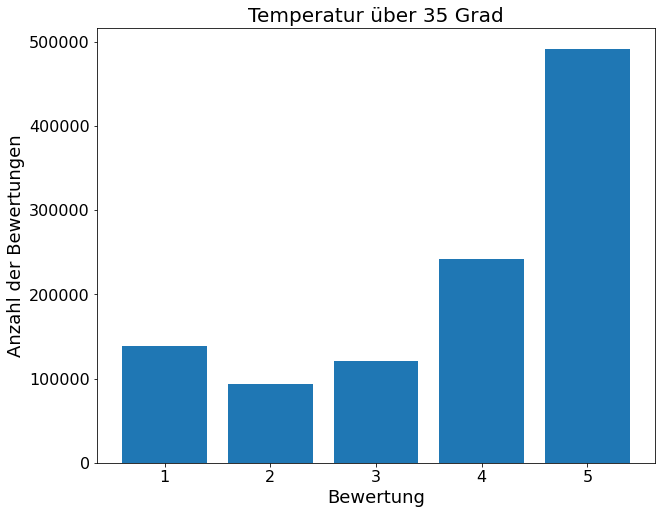

In [56]:
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


conn = psycopg2.connect(
        host="141.100.70.97",
        database="sync3",
        user="sync3",
        password="sync3",
        port="5432",
)
cursor = conn.cursor()
#query = "select cw.date, cw.tmax, cw.tmin, cw.perception,cw.snow,cw.snowdepth,star from cluster_weather as cw inner join reviews on cw.date=reviews.date where tmax>35 limit 10000"
query = """
select star, count(*) from
reviews inner join business as b
on b.bid=reviews.bid
inner join cluster_weather as cw
on b.clusterid = cw.clusterid and cw.date = reviews.date
where cw.tmax>35 and b.bid in (select bid from category
where cid = (select cid from categories where cat = 'Restaurants'))
group by star
"""

cursor.execute(query)
data2 = cursor.fetchall()
df2 = pd.read_sql(query,conn)
conn.close()

print(df2)

#tmax_array = np.zeros(len(df2))
#star_array = np.zeros(len(df2))

#for i in range(0,len(df)):
#    tmin_array[i]=data2[i][2]
#    star_array[i]=data2[i][6]
#y = tmax_array
#x = star_array

bars = ('1', '2', '3', '4', '5')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, df2["count"])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title("Temperatur über 35 Grad")
plt.xlabel("Bewertung")
plt.ylabel("Anzahl der Bewertungen")
plt.savefig('picture_präsi/Temperatur über 35 Grad.svg', dpi=300)
# Show graphic
plt.show()


# Bewertungen an Tagen, an denen es kein Regen gab 

   star    count
0     1   449107
1     2   316691
2     3   435236
3     4   854322
4     5  1507198


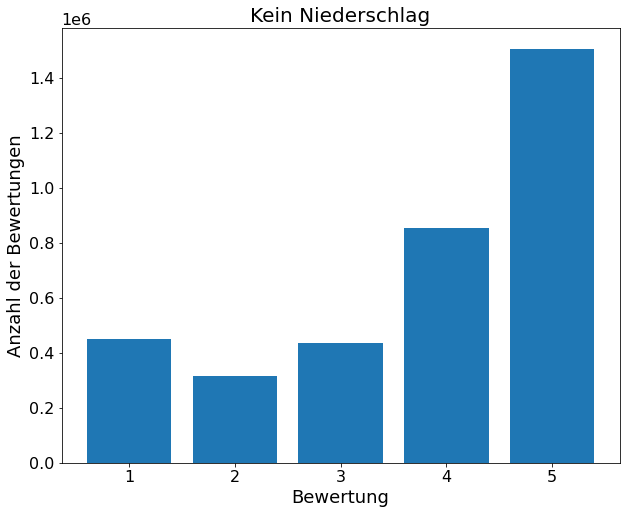

In [57]:
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


conn = psycopg2.connect(
        host="141.100.70.97",
        database="sync3",
        user="sync3",
        password="sync3",
        port="5432",
)
cursor = conn.cursor()
#query = "select cw.date, cw.tmax, cw.tmin, cw.perception,cw.snow,cw.snowdepth,star from cluster_weather as cw inner join reviews on cw.date=reviews.date where perception=0 limit 10000;"
query = """
select star, count(*) from
reviews inner join business as b
on b.bid=reviews.bid
inner join cluster_weather as cw
on b.clusterid = cw.clusterid and cw.date = reviews.date
where cw.perception=0 and b.bid in (select bid from category
where cid = (select cid from categories where cat = 'Restaurants'))
group by star
"""

"select count(*),star from cluster_weather as cw inner join reviews on cw.date=reviews.date where perception=0 Group by star limit 10000;"


cursor.execute(query)
data3 = cursor.fetchall()
df3 = pd.read_sql(query,conn)
conn.close()

print(df3)

#perception_array = np.zeros(len(df3))
#star_array = np.zeros(len(df3))

#for i in range(0,len(df3)):
#    tmin_array[i]=data3[i][2]
#    star_array[i]=data3[i][6]
#y = perception_array
#x = star_array
#print(x)
#print(y)

bars = ('1', '2', '3', '4', '5')
y_pos = np.arange(len(bars))
 
# Create bars
plt.bar(y_pos, df3["count"])
 
# Create names on the x-axis
plt.xticks(y_pos, bars)
plt.title("Kein Niederschlag")
plt.xlabel("Bewertung")
plt.ylabel("Anzahl der Bewertungen")
plt.savefig('picture_präsi//kein Regen.svg', dpi=300)
# Show graphic
plt.show()


In [79]:
df_cold = df1
df_hot = df2
df_dry = df3

In [80]:
df_cold["Unter 0°C"] = df_cold["count"]/sum(df_cold["count"])
df_hot["Über 35°C"] = df_hot["count"]/sum(df_hot["count"])
df_dry["kein Niederschlag"] = df_dry["count"]/sum(df_dry["count"])

In [81]:
result_df = pd.concat([df_cold[["star", "Unter 0°C"]], df_hot["Über 35°C"], df_dry["kein Niederschlag"]], axis=1)

In [82]:
result_df

,star,Unter 0°C,Über 35°C,kein Niederschlag
0,1,0.112280,0.128084,0.126063
1,2,0.095324,0.085650,0.088894
2,3,0.150797,0.111026,0.122170
3,4,0.292825,0.222592,0.239806
4,5,0.348774,0.452649,0.423067


In [84]:
melt_df = pd.melt(result_df, id_vars=["star"], value_vars=["Unter 0°C", "kein Niederschlag", "Über 35°C"])
melt_df

,star,variable,value
0,1,Unter 0°C,0.112280
1,2,Unter 0°C,0.095324
2,3,Unter 0°C,0.150797
3,4,Unter 0°C,0.292825
4,5,Unter 0°C,0.348774
5,1,kein Niederschlag,0.126063
6,2,kein Niederschlag,0.088894
7,3,kein Niederschlag,0.122170
8,4,kein Niederschlag,0.239806
9,5,kein Niederschlag,0.423067


In [89]:
def show_values_on_bars(axs, decimal):
    def _show_on_single_plot(ax):        
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + 0.01*p.get_height()
            if decimal == True:
                value = '{:.2f}'.format(p.get_height())
            else:
                value = '{:.0f}'.format(p.get_height())
            ax.text(_x, _y, value, ha="center", fontsize=14) 

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)

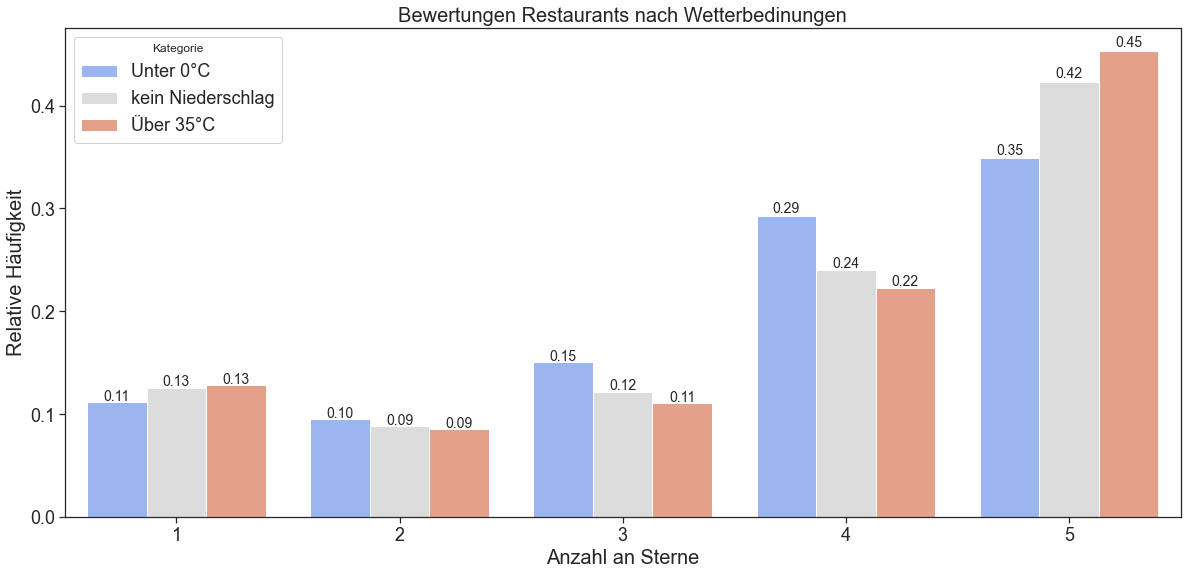

In [97]:
fig, axes = plt.subplots(1, 1, figsize=(20,9))

sns.set(style='ticks')
g = sns.barplot(ax = axes,
            x = 'star',
            y = 'value',
            hue="variable",
            data = melt_df,
            palette = 'coolwarm')
axes.set_title('Bewertungen Restaurants nach Wetterbedinungen', fontsize=20)
axes.set_xlabel('Anzahl an Sterne', fontsize=20)
axes.set_ylabel('Relative Häufigkeit', fontsize=20)
axes.legend(title='Kategorie', fontsize=18)
axes.tick_params(axis='both', which='major', labelsize=18)
show_values_on_bars(axes, True)

plt.savefig('picture_präsi//AlleDreiKats.svg', dpi=300)

-----------------------------------------------------------------------------------------------------------------------------

# User, die ein Restaurant öfter als 10 mal bewertet haben

In [108]:
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


conn = psycopg2.connect(
        host="141.100.70.97",
        database="sync3",
        user="sync3",
        password="sync3",
        port="5432",
)
cursor = conn.cursor()
query = "select b.bid, u.uid,categories.cat,count(*) from categories, business as b inner join reviews as r on b.bid=r.bid inner join users as u on r.uid=u.uid where categories.cat='Food' group by b.bid, u.uid, categories.cat HAVING count(*)>10 ORDER BY count(*)DESC;"
cursor.execute(query)
data = cursor.fetchall()
df = pd.read_sql(query,conn)
conn.close()

print(df)

                        bid                     uid   cat  count
0    J3H6VSIgUTlACkb_HPFA8w  JlQ-9fc61X9lbzZN6ZjORQ  Food     62
1    f8IMQgRwo-8GP372MElDGQ  Dl05etq6qzMf5NOskjb7Ag  Food     38
2    K_-l_AhoGQvYDeGNgm52qQ  4d13xAX2jp2EbGF8I9eZZw  Food     36
3    qNYLt8zizn--wEpT1KILfw  U6MkHGNWKMVWR8TO31QzeA  Food     32
4    z8fuQ6XYwfptZy-Tm1l9aQ  xq1zRJz5VHgEKiCaI51_Gw  Food     31
..                      ...                     ...   ...    ...
103  SbqlNhbtfW6Wyj61vyWxUg  O3pSxv1SyHpY4qi4Q16KzA  Food     11
104  wc0tCEgg6LlLPlBErWExdQ  mZDTMGAKWdTVj7lXqHSB6g  Food     11
105  0W_ICY9MEOIyuZFdChwpnw  O3pSxv1SyHpY4qi4Q16KzA  Food     11
106  -yApKLEFAvvNyifvpNKWCA  3nDUQBjKyVor5wV0reJChg  Food     11
107  za9qr9ZZWLTfEgTfogRbUw  pd1WTD0nBSo69CZF4Ha3Pg  Food     11

[108 rows x 4 columns]


#### --> Wie war das Wetter an den Tagen, an denen ein User ein Restaurant besucht bzw. bewertet hat? (Annahme: Reviews wurden am selben Tag geschrieben, an dem das Restaurant besucht wurde)
-----------------------------------------------------------------------------------------------------------------------------

## Korrelation zwischen Wetter und Bewertung

In [121]:
import psycopg2
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


conn = psycopg2.connect(
        host="141.100.70.97",
        database="sync3",
        user="sync3",
        password="sync3",
        port="5432",
)
cursor = conn.cursor()
query = "select categories.cat, cw.clusterid, cw.date, tmax, tmin, perception,snow,snowdepth,star from categories, cluster_weather as cw inner join reviews on cw.date=reviews.date where categories.cat='Food' limit 100000 ;"
cursor.execute(query)
data = cursor.fetchall()
df = pd.read_sql(query,conn)
conn.close()

print(df)

        cat  clusterid        date   tmax   tmin  perception  snow  snowdepth  \
0      Food         10  2018-04-15  12.97   1.87        6.06   0.0        0.0   
1      Food          9  2018-04-15  26.68  10.30        6.80   0.0        0.0   
2      Food          8  2018-04-15   2.00  -5.00       39.40  32.0       70.0   
3      Food          7  2018-04-15   1.12  -3.18       10.42  25.2       31.2   
4      Food          6  2018-04-15  29.23  12.80        0.00   0.0        0.0   
...     ...        ...         ...    ...    ...         ...   ...        ...   
99995  Food          4  2019-05-04  16.50   8.00        0.00   0.0        NaN   
99996  Food          3  2019-05-04  -0.13  -2.33        4.75  58.5        0.0   
99997  Food          2  2019-05-04  15.70   8.03        3.05   0.0        0.0   
99998  Food          1  2019-05-04  34.80  16.10        0.00   0.0        0.0   
99999  Food         10  2019-05-11  11.50   4.97        1.12   0.0        0.0   

       star  
0         5  

### Korrelation zwischen Tmax und Bewertung

In [126]:
df['star'].corr(df['tmax'])

-0.025100539654634223

### Korrelation zwischen der Tmin und Bewertung

In [127]:
df['star'].corr(df['tmin'])

-0.026058457843114377

### Korrelation zwischen Snow und Bewertung

In [128]:
df['star'].corr(df['snow'])

-0.0006248410500203706

### Korrelation zwischen Niederschlag und Bewertung

In [129]:
df['star'].corr(df['perception'])

-0.00230755652274685

# Gibt es an regenarmen Tagen genauso viele Bewertungen wie an regenreichen? 